In [209]:
import pandas as pd
import numpy as np
import random
from scipy.special import softmax
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
path = '/mnt/d/data/getamped/' 
df = pd.read_csv(path + 'getamped_300.csv', index_col = 0)
df_score = pd.read_csv(path + '겟앰상점악평점.csv', encoding = 'cp949').iloc[:,1:]

## 
## 본 로그는 유저의 성향, 계급, 시간대 기반 플레이 분포를 반영,
# 가설에 대한 검증 분석 연습을 위해 현실적인 조건을 반영하여 시뮬레이션했습니다.


In [161]:
# 계급별 labeling
class_level = {
    '금황룡' : 0, '은황룡' : 1, '동황룡' : 2, '금청룡' : 3, '은청룡' : 4, '동청룡' : 5, '금백호' : 6, '은백호' : 7, '동백호' : 8, '금주작' : 9, '은주작' : 10,
       '동주작' : 11, '금현무' : 12, '은현무' : 13, '동현무' : 14, '금코발' : 15, '은코발' : 16, '동코발' : 17, '금곰발' : 18, '은곰발' : 19,
       '동곰발' : 20
}


df['계급_label'] = df['계급'].map(class_level)

df.head(2)

,계급,액세서리,계급_label
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두",2
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브",3


In [162]:
# 맵 랜덤 초이스

top_maps = ['원형 경기장', '지하 감옥']
pop_maps = ['시티', '격투 경기장', '비밀의 방', '타이타닉']
mid_maps = ['망자의 미궁', '메카신 대사원', '천년정글', '골렘의 전당']
others = [
    'GWF', 'GWF 2008', '눈싸움 장', '고산대불', '고성', '고성2', '공성', '고대의 신전',
    '길거리', '남극', '노벨 항공모함', '노천탕', '네오 서울', '네오 사찰', '달나라', '대성당', '데스터널',
    '등대', '러시모어', '마녀들의 밤', '무릉도원', '문릿 와일드니스', '불의 제단', '브로큰 타워',
    '삐에로의 무대', '사각의 링', '사각 경기장', '사이트-51', '사신수 신전', '산타의 집', '수정 동굴',
    '스위트 협곡', '스카이쉽', '스타 콜로세움', '시티2', '아바타 신전', '아이스', '오다이바', '오션파크',
    '와이키키', '온천', '올림프드 2008', '용암동굴', '우미관', '우주 경기장', '우주 정거장', '우주항구',
    '앰프드 공터', '앰프드 교실', '앰프드 기념관', '앰프드 체육관', '앰프드 훈련소', '에라드래곤 공장',
    '위즈덤 라이브러리', '재즈바', '죽음의 늪', '지하철', '지하 투기장', '차이나 타운', '책상',
    '천공의 투기장', '천국과 지옥', '코만도', '콜로세움', '큐브 독', '킬에라', '킹 캐슬', '타운', '탈옥',
    '파티장', '푸른 해수욕장', '풍력 발전소', '폐기물 처리장', '해저', '화산동굴', '황야', '황혼 우주센터',
    '동굴', '물의 신전', '월하죽림', '천공의 제단', '하늘 정원', '하수구', '헬기장', '교량', '바벨타워'
]

# top, mid, pop, others
weights_by_rank = {
        '기타': [0.09, 0.01, 0.5, 0.4],
        '현무': [0.35, 0.05, 0.5, 0.2],
        '주작': [0.45, 0.05, 0.4, 0.1],
        '백호': [0.65, 0.1, 0.22, 0.03],
        '용': [0.6, 0.3, 0.07, 0.03]
    }

# 계급별 랭크에 따라 가중치를 곱해 4 분류중 선택
# 4 분류 내에서는 랜덤 초이스하여 유저별 맵 선택 로직완성

def get_rank_class(class_name):
    level = class_level.get(class_name, 20)  # 예외시 가장 낮은 계급 처리
    if level <= 2: return '용'
    elif level <= 5: return '용'
    elif level <= 8: return '백호'
    elif level <= 11: return '주작'
    elif level <= 14: return '현무'
    else: return '기타'

def select_map_by_user_class(user_class):
    rank = get_rank_class(user_class)
    weights = weights_by_rank[rank]
    
    category = random.choices(
        population=['top', 'mid', 'pop', 'other'],
        weights=weights,
        k=1
    )[0]
    
    if category == 'top':
        return random.choice(top_maps)
    elif category == 'mid':
        return random.choice(mid_maps)
    elif category == 'pop':
        return random.choice(pop_maps)
    else:
        return random.choice(others)
    


In [163]:
# 계급생성

rank_groups = {
    '황룡': ['금황룡', '은황룡', '동황룡'],
    '청룡': ['금청룡', '은청룡', '동청룡'],
    '백호': ['금백호', '은백호', '동백호'],
    '주작': ['금주작', '은주작', '동주작'],
    '현무': ['금현무', '은현무', '동현무'],
    '코끼리': ['금코발', '은코발', '동코발'],
    '곰': ['금곰발', '은곰발', '동곰발']
}

# 전체 비율
group_weights = {
    '황룡': 0.01,
    '청룡': 0.07,
    '백호': 0.27,
    '주작': 0.20,
    '현무': 0.21,
    '코끼리': 0.13,
    '곰': 0.11
}

# 세부 계급 및 개별 가중치 생성
class_names = []
class_weights = []

for group, classes in rank_groups.items():
    base_weight = group_weights[group] / 3
    for cls in classes:
        class_names.append(cls)
        class_weights.append(base_weight)

def generate_random_user_class():
    return random.choices(
        population=class_names,
        weights=class_weights,
        k=1
    )[0]


# for _ in range(100):
#     print(generate_random_user_class())

In [164]:
# 승패 생성
def determine_win(user_class, acc_perf_score):
    # 계급 레벨 → 실력 스케일링 (0.1~0.7)
    level = class_level.get(user_class, max(class_level.values()))
    level_score = np.interp(level, [min(class_level.values()), max(class_level.values())], [0.7, 0.1])

    # 액세서리 성능 정규화
    acc_score = acc_perf_score / 10

    # 노이즈
    noise = np.random.normal(0, 0.05)

    # 가중합 계산
    final_score = 0.6 * level_score + 0.3 * acc_score + 0.1 * noise

    # 확률 제한
    final_score = np.clip(final_score, 0.05, 0.95)

    return '승' if np.random.rand() < final_score else '패'

In [165]:
# 실 수집 300명 데이터에 따른 계급군 별 외형, 성능, 재미 평균치로 가중치 사전 
class_group_weights = {
    '곰' : (9.163500, 9.174000, 9.248344),
    '백호' : (9.198519, 9.173049, 9.243605),
    '용' : (9.231600, 9.150600, 9.202400),
    '주작' : (9.155633,9.142100, 9.212300),
    '코끼리' : (9.171026, 9.072564, 9.160692),
    '현무' : (9.228968, 9.198254, 9.285063)
}

# class 별 그룹핑 함수 

def get_class_group(class_name):
    if '황룡' in class_name or '청룡' in class_name:
        return '용'
    elif '백호' in class_name:
        return '백호'
    elif '주작' in class_name:
        return '주작'
    elif '현무' in class_name:
        return '현무'
    elif '코발' in class_name:
        return '코끼리'
    elif '곰발' in class_name:
        return '곰'
    else:
        return '기타'

In [166]:
count = {}
l = []
for i in range(len(df)):
    l += df['액세서리'][i].split(',')

for x in l:
    try:
        count[x] += 1
    except:
        count[x] = 1

sort_count = sorted(count.items(), key = lambda x:x[1], reverse = True)

In [167]:
df_score

,액세서리,외형,성능,재미
0,공수도플레임,8.8,9.2,9.5
1,황혼의달,9.3,8.5,8.5
2,프로즌글러브,8.8,8.9,8.8
3,봉인의지팡이(퍼플),5.8,7.8,6.2
4,아쿠아기어,9.5,9.7,9.7
...,...,...,...,...
656,SPY세트,8.2,8.5,8.8
657,스타브로우스렛,8.0,8.6,9.9
658,밥인형,9.2,8.8,9.3
659,폭탄모자,8.0,8.6,9.4


In [168]:
df_score['빈도'] = pd.merge(df_score, pd.DataFrame(sort_count, columns = ['액세서리', '빈도']), how = 'left', on = "액세서리").fillna(0)['빈도']

In [169]:
freq_scaled = np.log1p(df_score['빈도'])  # 로그 스케일
freq_scaled = freq_scaled / freq_scaled.max() 
freq_scaled

0      0.196562
1      0.000000
2      0.000000
3      0.000000
4      0.551818
         ...   
656    0.000000
657    0.000000
658    0.000000
659    0.000000
660    0.000000
Name: 빈도, Length: 661, dtype: float64

In [170]:
sum(class_group_weights[group])

27.585843999999998

In [171]:
def calculate_accessory_probabilities(user_class, df_score, class_group_weights):
    # 1. 계급군 가져오기
    group = get_class_group(user_class)  # 예: '현무'
    weights = np.array(class_group_weights[group])  # (재미, 성능, 외형)
    w1, w2, w3 = weights/(sum(weights))

    # 2. 성향 가중 점수 계산 및 정규화 (0 ~ 1)
    df_score['weighted_score'] = (
        df_score['재미'] * w1 +
        df_score['성능'] * w2 +
        df_score['외형'] * w3
    )

    ws_scaled = df_score['weighted_score']
    ws_scaled = (ws_scaled - ws_scaled.min()) / (ws_scaled.max() - ws_scaled.min())

    # 3. 빈도 보정: log(freq + 1) 및 정규화 (0 ~ 1)
    freq_scaled = np.log1p(df_score['빈도'])  # 로그 스케일
    freq_scaled = freq_scaled / freq_scaled.max()  # 0~1 정규화

    # 4. noise 추가
    noise = np.random.rand(len(df_score))

    df_score['adjusted_score'] = 0.5 * df_score['weighted_score'] + 0.3 * freq_scaled + 0.2 * noise

    # 5. softmax 확률로 변환
    probs = softmax(df_score['adjusted_score'])
    return probs

In [172]:
60 * 21

1260

In [173]:
# 유저의 플레이 시작 시간을 현실적인 시간대로 설정
def generate_play_minute():
    while True:
        minute = int(np.random.normal(loc=1260, scale=120))  # 평균 21:00, 표준편차 3시간
        if (minute >= 360 and minute < 1440) or (minute >= 0 and minute < 240): # 오전 6시 ~ 다음날 오전 4시 가지
            return minute

# 시간대 반영 + 세트 단위 로그 생성 함수
def generate_logs_for_user(user_id, user_class, date):
    logs = []
    MIN_BREAK = 1
    MAX_BREAK = 20
    total_play_minutes = random.randint(30, 360)
    played_minutes = 0
    session_counter = 0

    # realistic 시작 시각 부여
    play_minute = generate_play_minute()
    current_time = datetime.combine(date.date(), datetime.min.time()) + timedelta(minutes=play_minute)

    while played_minutes + 3 + MIN_BREAK <= total_play_minutes:
        set_start_time = current_time
        base_map = select_map_by_user_class(user_class)
        session_id = f"{user_id}_set{session_counter}"
        session_counter += 1

        # 액세서리 선택 (세트당 고정)

        probs = calculate_accessory_probabilities(user_class, df_score, class_group_weights)
        chosen_idx = np.random.choice(df_score.index, p=probs)
        chosen_acc = df_score.iloc[chosen_idx]

        # 세트 시간 랜덤
        set_total_seconds = random.randint(180, 600)
        round_durations = [set_total_seconds // 3] * 3

        for round_idx in range(3):
            map_used = base_map
            if base_map in others:
                map_used = select_map_by_user_class(user_class)

            result = determine_win(user_class, chosen_acc['성능'])
            round_play_time = set_start_time + timedelta(seconds=sum(round_durations[:round_idx]))

            logs.append([
                user_id, user_class, round_play_time,
                map_used, chosen_acc['액세서리'], result, session_id
            ])

        set_minutes = set_total_seconds / 60
        break_minutes = random.randint(MIN_BREAK, MAX_BREAK)
        played_minutes += set_minutes + break_minutes
        current_time += timedelta(minutes=set_minutes + break_minutes)

    return logs

In [174]:
random.seed(42)
np.random.seed(42)

num_users = 1000
user_pool = [
    {'user_id': f'user_{i}', 'class': generate_random_user_class()}
    for i in range(num_users)
]

all_logs = []
for day_offset in range(14):  # 4월 10일 ~ 17일
    current_date = datetime(2025, 3, 10) + timedelta(days=day_offset)
    for user in user_pool:
        if random.random() < 0.7:  # 70% 확률로 오늘 플레이
            logs = generate_logs_for_user(user['user_id'], user['class'], current_date)
            all_logs.extend(logs)

df_log = pd.DataFrame(
    all_logs,
    columns=['유저ID', '계급', '플레이시간', '맵', '사용액세서리', '승패여부', '플레이세션ID']
)


In [175]:
df_log.columns = ['유저ID', '계급', '플레이시간', '맵', '액세서리', '승패여부', '플레이세션ID']

In [176]:
df_score.head(1)

,액세서리,외형,성능,재미,빈도,weighted_score,adjusted_score
0,공수도플레임,8.8,9.2,9.5,1.0,9.165552,4.81205


In [177]:
use_cols = ['플레이세션ID', '유저ID', '계급', '플레이시간', '맵', '액세서리',
            '외형', '성능', '재미', '승패여부']

In [178]:
total_df = pd.merge(df_log, df_score, how = 'left', on = '액세서리')[use_cols]

In [179]:
tendency_score_per_user = total_df.groupby(['플레이세션ID', '유저ID'])[['외형', '성능', '재미']].mean()

In [180]:
mask = tendency_score_per_user['외형'] > tendency_score_per_user[['성능', '재미']].max(axis = 1)

tendency_score_per_user[mask]

,,외형,성능,재미
플레이세션ID,유저ID,,,
user_0_set14,user_0,9.400000,8.900000,9.000000
user_0_set15,user_0,9.600000,9.400000,9.500000
user_0_set2,user_0,9.357143,9.100000,9.300000
user_0_set22,user_0,9.000000,8.300000,8.500000
user_0_set9,user_0,9.500000,9.233333,9.200000
...,...,...,...,...
user_9_set16,user_9,9.150000,8.875000,8.950000
user_9_set18,user_9,9.100000,8.500000,8.750000
user_9_set3,user_9,9.225000,9.100000,9.200000


In [181]:
# 픽률 top 10 액세서리

session_table = total_df.drop_duplicates(subset = ['플레이세션ID', '유저ID'])
session_num = len(session_table)
pick_rate_table = (session_table.groupby('액세서리')[['액세서리']].count()/session_num).rename(columns = {'액세서리' :'pick_rate'}).sort_values('pick_rate', ascending = False).reset_index()
pick_rate_table.head(10)


,액세서리,pick_rate
0,끈끈이발사기,0.002808
1,화끈화끈발사기,0.002808
2,아쿠아시미터,0.002709
3,심판의건틀릿,0.002709
4,파워드럼통,0.002660
5,여신의횃불,0.002660
6,화염가방,0.002660
7,트랜스볼,0.002611
8,이빌드래곤,0.002611
9,건쉽트랜스포머,0.002561


In [182]:
# 픽률 top 10 액세서리

pd.merge(pick_rate_table.head(20), df_score, how = 'left', on = '액세서리')[['액세서리', '외형', '성능', '재미']]

,액세서리,외형,성능,재미
0,끈끈이발사기,9.3,9.5,9.7
1,화끈화끈발사기,9.4,9.5,9.6
2,아쿠아시미터,9.7,9.7,9.5
3,심판의건틀릿,9.6,9.7,9.8
4,파워드럼통,9.2,9.3,9.6
5,여신의횃불,9.7,9.6,9.6
6,화염가방,9.6,9.5,9.8
7,트랜스볼,9.2,9.7,9.8
8,이빌드래곤,9.8,9.7,9.7
9,건쉽트랜스포머,9.6,9.5,9.6


In [183]:
acc_count_per_class = session_table.groupby(['계급', '액세서리']).count()[['유저ID']].reset_index().rename(columns = {'유저ID' : 'count'})
total_by_class = acc_count_per_class.groupby('계급')[['count']].sum().reset_index().rename(columns = {'count' : 'total_cnt'})

acc_rates = acc_count_per_class.merge(total_by_class, how = 'left', on = '계급')
acc_rates['pick_rate_per_class'] = acc_rates['count']/acc_rates['total_cnt']
acc_rates

,계급,액세서리,count,total_cnt,pick_rate_per_class
0,금곰발,EPC전기충격봉,1,667,0.001499
1,금곰발,OMS-1,1,667,0.001499
2,금곰발,ROK암즈,1,667,0.001499
3,금곰발,RPS챔피언,3,667,0.004498
4,금곰발,가고일캐논,1,667,0.001499
...,...,...,...,...,...
8996,은황룡,플루토체인,1,80,0.012500
8997,은황룡,피닉스기어,1,80,0.012500
8998,은황룡,하피의날개,1,80,0.012500
8999,은황룡,환영의목걸이,1,80,0.012500


In [184]:
top5_by_class = acc_rates.groupby('계급').apply(lambda x: x.nlargest(5, 'pick_rate_per_class')).reset_index(drop = True)
top5_by_class = top5_by_class.merge(df_score, on = '액세서리', how = 'left')[['계급', '액세서리', 'pick_rate_per_class', '외형', '성능', '재미']].reset_index()

top5_by_class_res = top5_by_class.groupby('계급')[['외형', '성능', '재미']].mean().reset_index()
top5_by_class_res['class_level'] = top5_by_class_res['계급'].map(class_level)
top5_by_class_res.sort_values('class_level', ascending = True)


/tmp/ipykernel_1042/2788804737.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_by_class = acc_rates.groupby('계급').apply(lambda x: x.nlargest(5, 'pick_rate_per_class')).reset_index(drop = True)


,계급,외형,성능,재미,class_level
6,금황룡,8.88,8.68,9.10,0
20,은황룡,9.48,9.36,9.74,1
13,동황룡,9.10,9.10,9.50,2
3,금청룡,9.32,9.32,9.52,3
17,은청룡,9.38,9.28,9.28,4
10,동청룡,9.44,9.60,9.62,5
1,금백호,9.46,9.34,9.44,6
15,은백호,9.30,9.36,9.46,7
8,동백호,9.32,9.14,9.48,8
2,금주작,9.32,9.18,9.56,9


In [185]:
# 주요 맵별 픽률
main_maps = top_maps + pop_maps + mid_maps

acc_count_per_map = session_table.groupby(['맵', '액세서리']).count()[['유저ID']].reset_index().rename(columns = {'유저ID' : 'count'})
total_by_map = acc_count_per_map.groupby('맵')[['count']].sum().reset_index().rename(columns = {'count' : 'total_cnt'})



In [186]:
total_by_main_map = acc_count_per_map.merge(total_by_map[total_by_map['맵'].isin(main_maps)], on = '맵', how = 'left')[acc_count_per_map['맵'].isin(main_maps)].reset_index(drop = True).astype({'total_cnt' : int})
total_by_main_map['pick_rate'] = total_by_main_map['count']/total_by_main_map['total_cnt']

total_by_main_map

,맵,액세서리,count,total_cnt,pick_rate
0,격투 경기장,EPC전기충격봉,3,2276,0.001318
1,격투 경기장,NBN26그레네이드벨트,1,2276,0.000439
2,격투 경기장,OMS-1,6,2276,0.002636
3,격투 경기장,ROK암즈,4,2276,0.001757
4,격투 경기장,RPS챔피언,6,2276,0.002636
...,...,...,...,...,...
4952,타이타닉,흑기사의갑옷,7,2255,0.003104
4953,타이타닉,히어로벨트,5,2255,0.002217
4954,타이타닉,히어로브로우스렛,6,2255,0.002661
4955,타이타닉,히트부스터,1,2255,0.000443


In [245]:
total_by_main_map_top7 = total_by_main_map.groupby('맵').apply(lambda x: x.nlargest(7, 'pick_rate')).reset_index(drop = True)
total_by_main_map_top7  = total_by_main_map_top7.merge(df_score, on = '액세서리', how = 'left')[['맵', '액세서리', 'pick_rate', '외형', '성능', '재미']].reset_index()

/tmp/ipykernel_1042/1745819184.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_by_main_map_top7 = total_by_main_map.groupby('맵').apply(lambda x: x.nlargest(7, 'pick_rate')).reset_index(drop = True)


In [248]:
map_res = total_by_main_map_top7.groupby('맵')[['외형', '성능','재미']].mean()

map_res['gap'] = map_res['성능'] - map_res['재미']
map_res

,외형,성능,재미,gap
맵,,,,
격투 경기장,9.442857,9.371429,9.442857,-0.071429
골렘의 전당,9.328571,9.385714,9.485714,-0.100000
망자의 미궁,9.185714,9.114286,9.257143,-0.142857
메카신 대사원,9.142857,9.071429,9.442857,-0.371429
비밀의 방,9.314286,9.385714,9.414286,-0.028571
시티,9.442857,9.442857,9.428571,0.014286
원형 경기장,9.514286,9.557143,9.528571,0.028571
지하 감옥,9.357143,9.300000,9.514286,-0.214286
천년정글,9.228571,9.157143,9.271429,-0.114286


In [241]:
user_map_cnt = session_table.groupby(['유저ID', '맵'])[['맵']].count().rename(columns = {'맵' : 'count'}).reset_index()
user_map_cnt_top5 = user_map_cnt.groupby(['유저ID']).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop = True)

user_map_cnt_top5.groupby('맵')[['유저ID']].count().rename(columns = {'유저ID' : "intop5_cnt"}).reset_index().sort_values('intop5_cnt', ascending = False).head(10)


/tmp/ipykernel_1042/1445491254.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_map_cnt_top5 = user_map_cnt.groupby(['유저ID']).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop = True)


,맵,intop5_cnt
54,지하 감옥,809
52,원형 경기장,806
2,격투 경기장,773
31,비밀의 방,629
40,시티,626
60,타이타닉,586
7,골렘의 전당,186
23,망자의 미궁,156
24,메카신 대사원,145
57,천년정글,89


In [188]:
# 승패에 따른 점수

session_table.groupby('승패여부')[['재미', '성능', '외형']].mean()

,재미,성능,외형
승패여부,,,
승,9.225648,9.057548,9.171914
패,9.191495,9.019670,9.145349


In [189]:
session_table.groupby(['계급','승패여부'])[['재미', '성능', '외형']].mean()

재미        성능        외형
계급  승패여부                              
금곰발 승     9.179921  9.018898  9.162205
    패     9.183293  9.021065  9.142131
금백호 승     9.218839  9.051380  9.173073
    패     9.154196  8.997582  9.116358
금주작 승     9.226141  9.047718  9.171162
    패     9.146522  8.967826  9.074130
금청룡 승     9.242105  9.053759  9.148496
    패     9.222794  9.033824  9.131618
금코발 승     9.261538  9.111189  9.197552
    패     9.249664  9.061298  9.176957
금현무 승     9.224597  9.051537  9.182723
    패     9.172159  8.996449  9.123864
금황룡 승     9.172131  9.026230  9.104918
    패     9.152174  9.000000  9.178261
동곰발 승     9.231126  9.099669  9.193709
    패     9.189882  9.042664  9.144351
동백호 승     9.209192  9.041226  9.160724
    패     9.155310  8.951659  9.123673
동주작 승     9.213255  9.028719  9.155965
    패     9.228299  9.049388  9.178231
동청룡 승     9.257874  9.072441  9.169291
    패     9.216754  9.027749  9.158115
동코발 승     9.250617  9.093333  9.203704
    패     9.188126  9.032904  9.141059
동현무 승     9.252031  9.091406  9.203281
    패     9.201826  9.049543  9.145548
동황룡 승     9.366667  9.113889  9.252778
    패     9.121053  8.863158  9.100000
은곰발 승     9.260140  9.098951  9.216084
    패     9.201984  9.023016  9.168056
은백호 승     9.235502  9.064211  9.172249
    패     9.194554  9.017698  9.139851
은주작 승     9.224106  9.061854  9.160530
    패     9.203419  9.025499  9.157977
은청룡 승     9.230769  9.107692  9.241758
    패     9.226214  9.032039  9.155340
은코발 승     9.223837  9.047093  9.152907
    패     9.207544  9.048743  9.169826
은현무 승     9.184730  9.013784  9.129324
    패     9.192991  9.027220  9.170911
은황룡 승     9.280357  9.057143  9.158929
    패     9.262500  9.025000  9.245833

In [190]:
win_counts = df_log.groupby(['액세서리', '승패여부']).size().unstack(fill_value=0)

win_counts['승률'] = win_counts['승'] / (win_counts['승'] + win_counts['패'])

win_counts

승패여부,승,패,승률
액세서리,,,
EPC전기충격봉,228,234,0.493506
NBN26그레네이드벨트,142,182,0.438272
OMS-1,331,326,0.503805
ROK암즈,176,181,0.492997
RPS챔피언,247,254,0.493014
...,...,...,...
흑기사의갑옷,269,274,0.495396
히어로벨트,230,262,0.467480
히어로브로우스렛,258,279,0.480447


In [191]:
acc_win_rate = df_score.merge(win_counts.sort_values('승률', ascending = False).reset_index(), on = '액세서리', how = 'left')[['액세서리','승률', '외형', '성능', '재미']]
acc_win_rate.sort_values('승률', ascending = False).tail(20)

,액세서리,승률,외형,성능,재미
660,검도호구,0.412844,8.3,8.2,8.7
648,마스코트세트,0.412698,7.9,6.0,6.6
34,외계인변신벨트,0.410667,8.4,7.7,8.4
533,야수의목걸이,0.404984,7.6,7.4,8.4
5,듀얼펜서,0.402516,7.6,6.1,5.9
51,페이탈스트라이프,0.399306,8.9,7.3,7.5
21,오미너스스타,0.399061,7.8,6.5,6.8
14,엽기햄스터슈트,0.398374,8.7,6.8,7.9
80,패러사이트웜,0.395833,7.3,6.8,7.7
45,코즈믹피스-루나,0.391437,9.0,7.2,7.5


In [192]:
acc_win_rate.sort_values('승률', ascending = False).query('`승률` > 0.45 & `승률` < 0.5')

,액세서리,승률,외형,성능,재미
249,신선의수염,0.499320,9.8,9.8,9.5
362,요정의팔찌,0.499225,9.6,9.6,9.6
631,지뢰포트,0.499154,9.2,9.0,9.0
530,암바주카,0.499014,9.0,8.8,9.1
430,엽기팬더슈트,0.498990,9.5,8.9,9.3
...,...,...,...,...,...
399,엽기양슈트,0.450617,9.6,9.6,9.7
272,스파르타스피어,0.450521,8.4,8.0,8.5
134,케이지해머,0.450450,8.3,8.4,8.9
397,야옹야옹세트,0.450249,8.3,7.9,8.2


In [193]:
# 픽률과 재미간 상관성

pick_rate_table.merge(df_score, on = '액세서리', how = 'left')[['pick_rate', '재미', '외형', '성능']].corr()

,pick_rate,재미,외형,성능
pick_rate,1.000000,0.699739,0.671766,0.729626
재미,0.699739,1.000000,0.751407,0.873982
외형,0.671766,0.751407,1.000000,0.764051
성능,0.729626,0.873982,0.764051,1.000000


In [156]:
acc_win_rate[['승률', '외형', '성능', '재미']].corr()

,승률,외형,성능,재미
승률,1.000000,0.523425,0.698568,0.634530
외형,0.523425,1.000000,0.764051,0.751407
성능,0.698568,0.764051,1.000000,0.873982
재미,0.634530,0.751407,0.873982,1.000000


In [197]:
pick_rate_table

,액세서리,pick_rate
0,끈끈이발사기,0.002808
1,화끈화끈발사기,0.002808
2,아쿠아시미터,0.002709
3,심판의건틀릿,0.002709
4,파워드럼통,0.002660
...,...,...
656,이모션마스크,0.000345
657,정의의천칭,0.000296
658,인라인스케이트,0.000246
659,백설공주,0.000246


In [225]:
pick_rate_table.merge(acc_win_rate, on = '액세서리', how = 'left').sort_values(['pick_rate', '승률'], ascending = [True, False]).head(50)

,액세서리,pick_rate,승률,외형,성능,재미
660,샤름베르쥬,0.000197,0.380952,8.0,3.9,4.4
658,인라인스케이트,0.000246,0.371429,6.4,6.4,6.4
659,백설공주,0.000246,0.296296,5.5,4.8,5.0
657,정의의천칭,0.000296,0.437037,7.7,7.6,7.6
655,봉인의지팡이(퍼플),0.000345,0.455556,5.8,7.8,6.2
654,빽팩,0.000345,0.429078,8.7,8.5,8.0
656,이모션마스크,0.000345,0.366667,5.0,4.9,5.6
653,버팔로뿔,0.000394,0.386667,8.2,8.1,8.1
650,캔디메이스,0.000443,0.422222,7.2,7.2,7.5
652,다이나모기어,0.000443,0.377193,6.8,5.9,5.6


<Axes: xlabel='승률', ylabel='외형'>

/home/horyang0221/miniconda3/envs/my_base2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/horyang0221/miniconda3/envs/my_base2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/horyang0221/miniconda3/envs/my_base2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/horyang0221/miniconda3/envs/my_base2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/horyang0221/miniconda3/envs/my_base2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missin

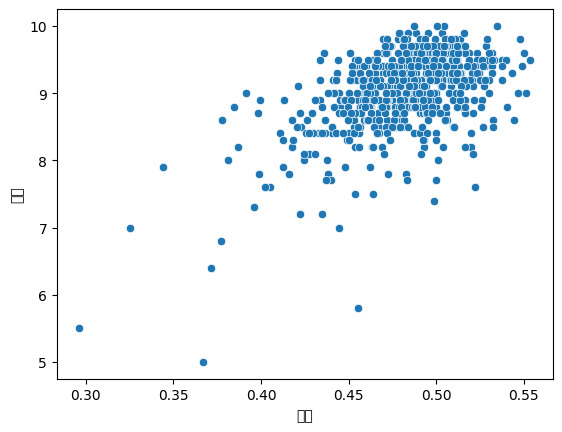

In [221]:
sns.scatterplot(data = pick_rate_table.merge(acc_win_rate, on = '액세서리', how = 'left')[['pick_rate', '승률', '재미', '성능', '외형']], x = '승률', y = '외형')

In [218]:
df_score['재미구간'] = pd.cut(df_score['재미'], bins=[0, 8.5, 9.0, 9.5, 10])
merged = pick_rate_table.merge(df_score[['액세서리', '성능', '재미구간']], on = '액세서리', how = 'left')

merged.groupby('재미구간')[['성능', 'pick_rate']].corr()

/tmp/ipykernel_1042/2630503931.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby('재미구간')[['성능', 'pick_rate']].corr()


성능  pick_rate
재미구간                                      
(0.0, 8.5]  성능         1.000000   0.629677
            pick_rate  0.629677   1.000000
(8.5, 9.0]  성능         1.000000   0.464886
            pick_rate  0.464886   1.000000
(9.0, 9.5]  성능         1.000000   0.481884
            pick_rate  0.481884   1.000000
(9.5, 10.0] 성능         1.000000   0.420729
            pick_rate  0.420729   1.000000

In [219]:
df_score[['성능', '재미']].corr()

,성능,재미
성능,1.000000,0.873982
재미,0.873982,1.000000
